The first possible strategy for building a computer opponent is to make shots totally at random.

In [1]:
import random as pyrandom
from Gameboard import *

First we write function to generate random board location.

In [2]:
def get_random_location():
    row_str = pyrandom.choice(Gameboard.row_labels)
    col_str = pyrandom.choice(Gameboard.col_labels)
    return row_str + str(col_str)

In [3]:
get_random_location()

'G6'

That's fine but we want to choose a random location from locations which are not aleady selected. For that, we create Random class. When it's instantiated, list of available locations is initialized. When a random location is chosen, it's taken out from available locations list.

In [4]:
class Random:
    def __init__(self):
        # possible locations list isn't affected by the methods
        self.possible_locations = []
        self.available_locations = []
        for i in Gameboard.row_labels:
            for j in Gameboard.col_labels:
                self.possible_locations.append(i + str(j))
                self.available_locations.append(i + str(j))
        
    def reset_available_locations(self):
        self.available_locations = self.possible_locations.copy()
        
    # chooses random location from available locations list and removes it if keep is False
    def choose(self, keep=False):
        choice = pyrandom.choice(self.available_locations)
        if not keep:
            self.available_locations.remove(choice)
        return choice
    
    # returns random location from possible locations list
    def choose_from_all(self):
        return pyrandom.choice(self.possible_locations)

In [5]:
%%capture
random = Random()

# create Gameboard object
board = Gameboard()

# manually add ships
board.hide_ship('A2', 'A3', 'A4')
board.hide_ship('C2', 'C3', 'C4', 'C5', 'C6')
board.hide_ship('E3', 'F3')
board.hide_ship('F5', 'G5', 'H5', 'I5')
board.hide_ship('D9', 'E9', 'F9')

# run one game
while True:
    board.shoot(random.choose())
    if board.is_game_over():
        break

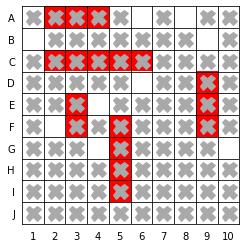

In [6]:
board.get_figure()